In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/water.csv')
data.head(2)

,Unnamed: 0,Canal_id,year,Canal_name,Sample_water_point,TEMP. (oC),pH,DO (mg/l),H2S (mg/l),BOD (mg/l),COD (mg/l),SS (mg/l),TKN (mg/l),NH3N (mg/l),NO2 (mg/l),NO3 (mg/l),T-P (mg/l),T.Coliform (col/100ml),Sample_water_point (EN),Canal_name (EN)
0,1,12.0,2561,คลองคูเมืองเดิม,ปตร.ราชินี,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.0,2.2,0.1,930000.0,Her Royal Highness Princess Maha Chakri Sirind...,Khlong Khu Mueang Derm
1,2,13.0,2561,คลองคูเมืองเดิม,หน้ากรมที่ดิน,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.0,2.2,0.1,11000000.0,Department of Lands page,Khlong Khu Mueang Derm


In [4]:
data.shape

(917, 20)

In [5]:
data.columns

Index(['Unnamed: 0', 'Canal_id', 'year', 'Canal_name', 'Sample_water_point',
       'TEMP. (oC)', '  pH', 'DO (mg/l)', 'H2S (mg/l)', 'BOD (mg/l)',
       'COD (mg/l)', 'SS (mg/l)', 'TKN (mg/l)', 'NH3N (mg/l)', 'NO2 (mg/l)',
       'NO3 (mg/l)', 'T-P (mg/l)', 'T.Coliform (col/100ml)',
       'Sample_water_point (EN)', 'Canal_name (EN)'],
      dtype='object')

In [6]:
cols = {
    'Unnamed: 0': 'Index',
    'Canal_id': 'CID',
    'year': 'Year',
    'Canal_name': 'CN',
    'Sample_water_point': 'WSP',
    'TEMP. (oC)': 'Temp',
    '  pH': 'pH',
    'DO (mg/l)': 'DO',
    'H2S (mg/l)': 'HS',
    'BOD (mg/l)': 'BO',
    'COD (mg/l)': 'CO',
    'SS (mg/l)': 'SS',
    'TKN (mg/l)': 'TKN',
    'NH3N (mg/l)': 'AN',
    'NO2 (mg/l)': 'NO2N',
    'NO3 (mg/l)': 'NO3N',
    'T-P (mg/l)': 'TP',
    'T.Coliform (col/100ml)': 'TC',
    'Sample_water_point (EN)': 'WSPEN',
    'Canal_name (EN)': 'CNEN'
}


data = data.rename(columns=cols)
data.columns

Index(['Index', 'CID', 'Year', 'CN', 'WSP', 'Temp', 'pH', 'DO', 'HS', 'BO',
       'CO', 'SS', 'TKN', 'AN', 'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN'],
      dtype='object')

In [7]:
data['CNEN'].value_counts()

CNEN
Khlong Saen Saep                               33
Khlong Prem Prachakorn                         24
Khlong Chong Nonsi                             18
Khlong Rob Krung                               18
Khlong Phlapphla                               18
                                               ..
Khlong Bang Luang                               1
Khlong Phra Rajadamri 1 (Khlong Bueng Phai)     1
Khlong Phraya Suren                             1
Orachon Canal                                   1
Khlong Tanod                                    1
Name: count, Length: 168, dtype: int64

**Data Preprocessing**

In [7]:
data.describe()

,Index,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,9.170000e+02
mean,459.000000,729.759324,2562.008724,28.694329,7.242007,1.667045,0.179804,12.802672,64.103762,21.953719,7.999945,4.358997,0.146205,2.123228,0.947895,2.181025e+118
std,264.859397,553.978537,0.820008,1.845115,0.462830,1.282984,0.389665,9.397183,22.350496,17.194847,5.133194,3.600244,0.131068,0.692240,0.519764,6.604582e+119
min,1.000000,12.000000,2561.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,230.000000,221.000000,2561.000000,28.500000,7.130000,0.510000,0.000000,6.250000,51.000000,12.000000,4.100000,1.500000,0.020000,1.700000,0.520000,1.220000e+08
50%,459.000000,591.000000,2562.000000,29.000000,7.290000,1.600000,0.000000,9.800000,60.500000,17.000000,7.100000,3.460000,0.110000,2.000000,0.900000,1.530000e+10
75%,688.000000,1191.000000,2563.000000,29.300000,7.400000,2.600000,0.200000,15.830000,72.100000,26.000000,10.800000,6.100000,0.210000,2.500000,1.250000,2.100000e+12
max,917.000000,1822.000000,2563.000000,31.900000,9.100000,9.700000,5.000000,84.500000,202.000000,148.300000,39.800000,23.330000,0.730000,8.600000,3.530000,2.000000e+121


Check for column types.

In [8]:
data.dtypes

Index      int64
CID      float64
Year       int64
CN        object
WSP       object
Temp     float64
pH       float64
DO       float64
HS       float64
BO       float64
CO       float64
SS       float64
TKN      float64
AN       float64
NO2N     float64
NO3N     float64
TP       float64
TC       float64
WSPEN     object
CNEN      object
dtype: object

Drop unnecessary columns from the dataset.

In [9]:
# We have translated Canal Name and Water Source Point. So drop those columns in thai language.
data.drop(columns=['Index', 'CN', 'WSP'], inplace=True)

In [10]:
data.dtypes

CID      float64
Year       int64
Temp     float64
pH       float64
DO       float64
HS       float64
BO       float64
CO       float64
SS       float64
TKN      float64
AN       float64
NO2N     float64
NO3N     float64
TP       float64
TC       float64
WSPEN     object
CNEN      object
dtype: object

Check for null values in the dataset.

In [11]:
data.isna().sum()

CID      0
Year     0
Temp     0
pH       0
DO       0
HS       0
BO       0
CO       0
SS       0
TKN      0
AN       0
NO2N     0
NO3N     0
TP       0
TC       0
WSPEN    0
CNEN     0
dtype: int64

Seems we have no null values in our dataset.

In [12]:
data.head()

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN
0,12.0,2561,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.00,2.2,0.1,930000.0,Her Royal Highness Princess Maha Chakri Sirind...,Khlong Khu Mueang Derm
1,13.0,2561,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.00,2.2,0.1,11000000.0,Department of Lands page,Khlong Khu Mueang Derm
2,14.0,2561,25.0,8.0,1.7,0.0,5.0,56.0,24.0,2.2,0.6,0.34,2.3,0.2,4600000.0,"Mother Earth Muay Hair Monument, Sanam Luang",Khlong Khu Mueang Derm
3,15.0,2561,25.0,7.9,3.0,0.0,4.0,47.0,17.0,2.8,0.6,0.00,1.9,0.1,30000.0,Phra Pinklao Police Station,Khlong Khu Mueang Derm
4,16.0,2561,25.0,7.3,1.4,0.0,6.0,36.0,7.0,2.8,0.6,0.14,1.1,0.3,1500000.0,Bridge in front of the Ministry of Interior,Khlong Khu Mueang Derm


In [13]:
data.columns

Index(['CID', 'Year', 'Temp', 'pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN'],
      dtype='object')

In [8]:
# using label encoding for these 4 features
# as they are objects and need to be a real num or a int.

from sklearn.preprocessing import LabelEncoder

features = ["WSPEN", "CNEN"]

for feat in features:
    le = LabelEncoder()
    data[feat] = le.fit_transform(data[feat])

In [15]:
data.head()

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN
0,12.0,2561,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.00,2.2,0.1,930000.0,61,61
1,13.0,2561,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.00,2.2,0.1,11000000.0,58,61
2,14.0,2561,25.0,8.0,1.7,0.0,5.0,56.0,24.0,2.2,0.6,0.34,2.3,0.2,4600000.0,114,61
3,15.0,2561,25.0,7.9,3.0,0.0,4.0,47.0,17.0,2.8,0.6,0.00,1.9,0.1,30000.0,155,61
4,16.0,2561,25.0,7.3,1.4,0.0,6.0,36.0,7.0,2.8,0.6,0.14,1.1,0.3,1500000.0,28,61


In [16]:
data['TC'].describe()

count     9.170000e+02
mean     2.181025e+118
std      6.604582e+119
min       0.000000e+00
25%       1.220000e+08
50%       1.530000e+10
75%       2.100000e+12
max      2.000000e+121
Name: TC, dtype: float64

In [17]:
data.columns

Index(['CID', 'Year', 'Temp', 'pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN'],
      dtype='object')

In [18]:
data.head(3)

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN
0,12.0,2561,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.00,2.2,0.1,930000.0,61,61
1,13.0,2561,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.00,2.2,0.1,11000000.0,58,61
2,14.0,2561,25.0,8.0,1.7,0.0,5.0,56.0,24.0,2.2,0.6,0.34,2.3,0.2,4600000.0,114,61


**Feature Engineering**

Here lets engineer a new feature called ISQA (Simple Water Quality Index) using the formula 
- ISQA = ITEMP * (IBOD + ITSS + IDO)
where,
    - ITEMP = Water Temperature Index
    - IBOD = Biological Oxygen Demand Index
    - ITSS = Total Suspended Solids Index
    - IDO = Dissolved Oxygen Index

In [19]:
# data["TDS"] = (
#     0.6 * data["NO3N"] +
#     0.8 * data["NO2N"] +
#     0.5 * data["TKN"] +
#     0.7 * data["AN"] + #NH3N
#     0.9 * data["TP"] +
#     0.05 * data["SS"]
# )

# data['TDS'] = data['TDS'] * 50  #tuned for COND 200–1500 μS/cm
# data['COND'] = 0.7 * data['TDS']

In [20]:
# data['COND'].describe()

In [129]:
features = data[['Temp', 'pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC']]

# Step 1: Define normalization ranges (adjust based on WHO/PCD standards)
ranges = {
    'Temp': {'min': 15, 'max': 35, 'optimal': (20, 30)},  # Optimal temperature range
    'pH': {'min': 6.5, 'max': 8.5, 'optimal': (6.5, 8.5)},  # Optimal pH range
    'DO': {'min': 2, 'max': 9, 'optimal': (6, 9)},  # Higher is better
    'HS': {'min': 0, 'max': 0.1, 'optimal': (0, 0.01)},  # Lower is better
    'BO': {'min': 0, 'max': 10, 'optimal': (0, 2)},  # Lower is better
    'CO': {'min': 0, 'max': 50, 'optimal': (0, 10)},  # Lower is better
    'SS': {'min': 0, 'max': 100, 'optimal': (0, 20)},  # Lower is better
    'TKN': {'min': 0, 'max': 5, 'optimal': (0, 1)},  # Lower is better
    'AN': {'min': 0, 'max': 1.5, 'optimal': (0, 0.2)},  # Lower is better
    'NO2N': {'min': 0, 'max': 1, 'optimal': (0, 0.1)},  # Lower is better
    'NO3N': {'min': 0, 'max': 50, 'optimal': (0, 10)},  # Lower is better
    'TP': {'min': 0, 'max': 1, 'optimal': (0, 0.1)},  # Lower is better
    'TC': {'min': 0, 'max': 5000, 'optimal': (0, 50)}  # Lower is better
}

# Normalization function (0–100 scale)
def normalize_parameter(value, param, ranges):
    min_val = ranges[param]['min']
    max_val = ranges[param]['max']
    optimal = ranges[param]['optimal']
    
    # Clip values to min/max range
    value = np.clip(value, min_val, max_val)
    
    # For parameters where higher is better (e.g., DO)
    if param == 'DO':
        return 100 * (value - min_val) / (max_val - min_val)
    # For parameters where optimal range is best (e.g., pH, Temp)
    elif param in ['pH', 'Temp']:
        if value < optimal[0] or value > optimal[1]:
            return 50 * (1 - abs(value - np.mean(optimal)) / (max_val - min_val))  # Penalize deviation
        return 100  # Optimal range
    # For parameters where lower is better (e.g., HS, BO, CO, etc.)
    else:
        return 100 * (max_val - value) / (max_val - min_val)

# Apply normalization to all parameters
normalized_features = features.copy()
for param in features.columns:
    if param in ranges:
        normalized_features[param] = features[param].apply(lambda x: normalize_parameter(x, param, ranges))


# Step 2: Assign weights (example weights, replace with actual WHO/PCD values)
weights = {
    'Temp': 0.05,
    'pH': 0.11,
    'DO': 0.17,
    'HS': 0.06,
    'BO': 0.11,
    'CO': 0.10,
    'SS': 0.08,
    'TKN': 0.08,
    'AN': 0.08,
    'NO2N': 0.07,
    'NO3N': 0.07,
    'TP': 0.09,
    'TC': 0.08
}

# Ensure weights sum to 1 (optional, depending on standard)
weight_sum = sum(weights.values())
if not np.isclose(weight_sum, 1.0):
    weights = {k: v / weight_sum for k, v in weights.items()}

# Step 3: Calculate sub-indices (normalized value * weight)
sub_indices = normalized_features.copy()
for param in features.columns:
    if param in ranges:
        sub_indices[param] = normalized_features[param] * weights[param]

# Step 4: Calculate WQI
# WQI = sum(sub_indices) / sum(weights), but since weights are normalized, sum(weights) = 1
data['WQI'] = sub_indices.sum(axis=1)

data['WQI'].head()

0    57.558261
1    57.689938
2    53.354783
3    59.497888
4    55.761739
Name: WQI, dtype: float64

In [95]:
data['WQI'].describe()

count    917.000000
mean      39.542023
std        9.147667
min       25.746087
25%       31.638261
50%       37.229317
75%       46.233043
max       81.956522
Name: WQI, dtype: float64

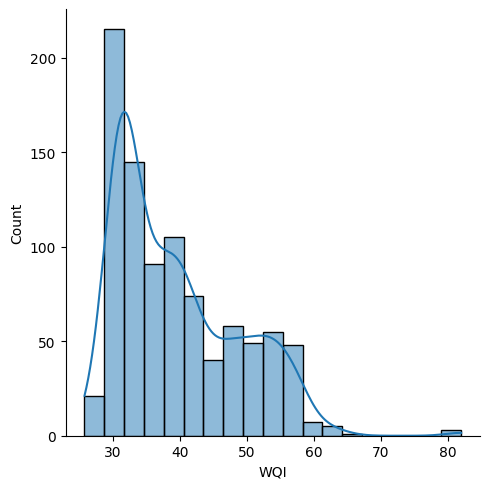

In [97]:
sns.displot(data['WQI'], kde= True)

Box plot of `target` variable and `NO2N` value of water.

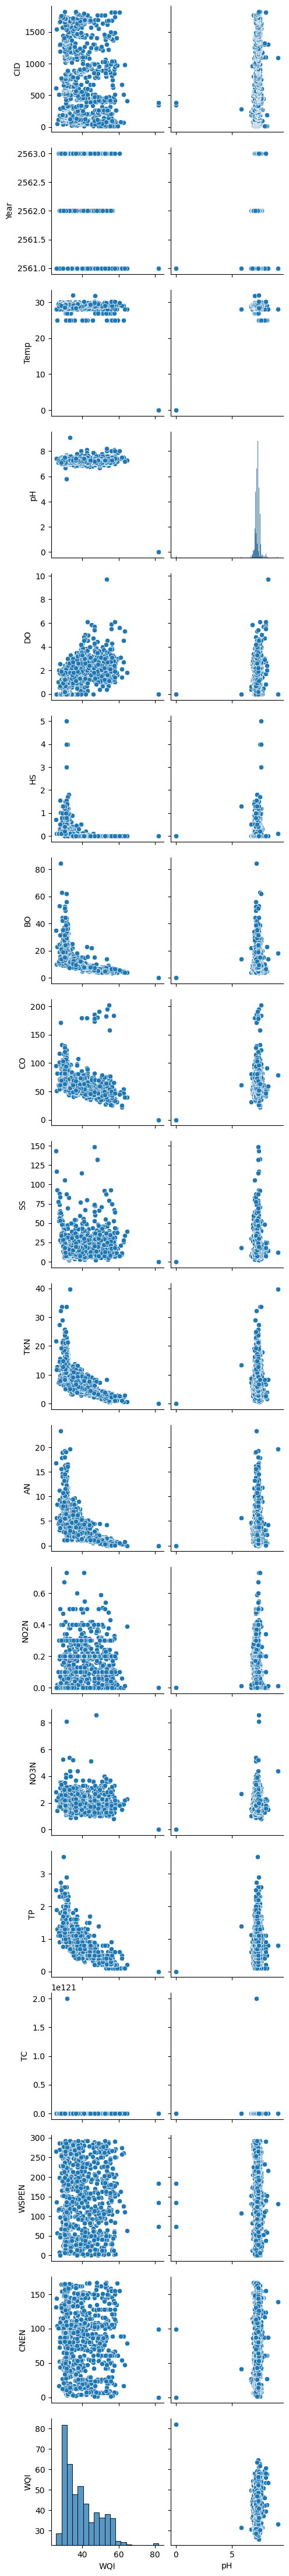

In [24]:
sns.pairplot(data= data, x_vars=['WQI', 'pH'])
plt.xticks(rotation=45)
# plt.title('Box Plot of Numerical vs Categorical Data')
plt.show()

Swarm plot for numerical data `pH` and categorical data `target`

/home/puskr/ml_project/ml-project-water-potability/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/puskr/ml_project/ml-project-water-potability/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


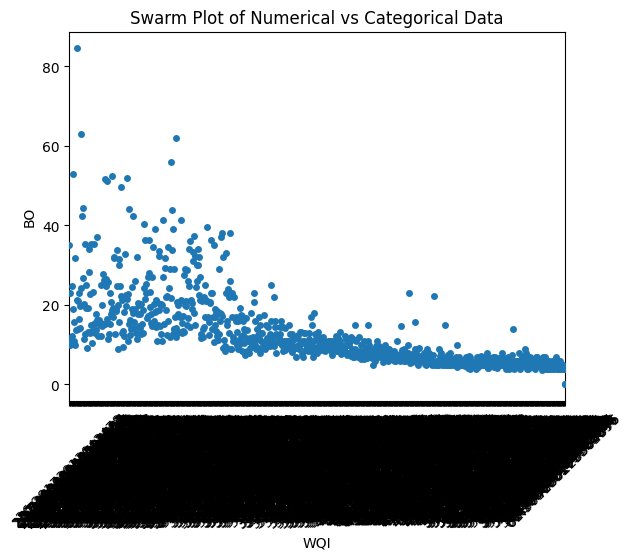

In [25]:
sns.swarmplot(x='WQI', y='BO', data=data)
plt.xticks(rotation=45)
plt.title('Swarm Plot of Numerical vs Categorical Data')
plt.show()

Pair plot between ph value of water and Ammonia Nitrate in water.

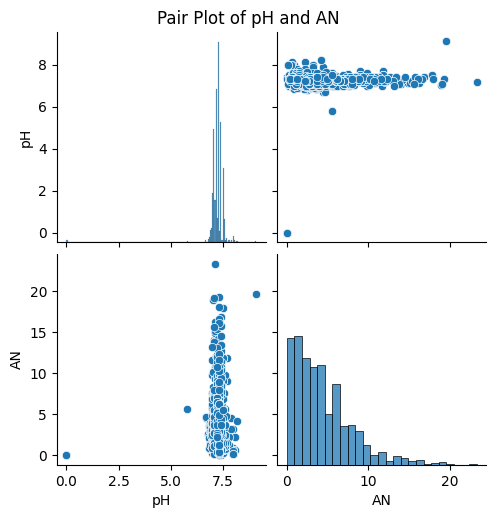

In [26]:
sns.pairplot(data=data[['pH', 'AN']])
plt.suptitle('Pair Plot of pH and AN', y=1.02)
plt.show()

In [27]:
# feats = data[['Temp', 'DO', 'BO', 'CO', 'SS']]

# sns.pairplot(feats, diag_kind='hist')

In [28]:
# plt.figure(figsize=(15, 15))
# sns.heatmap(data=data.drop(columns=['CID', 'BO', 'SS', 'Temp', 'DO']).corr(numeric_only=True), annot=True)
# plt.show()

In [66]:
data['WQI'].value_counts()

WQI
2.341847       3
566.912559     2
570.136429     2
1128.195591    1
947.413611     1
              ..
1084.635820    1
510.231792     1
919.900163     1
875.126921     1
685.563615     1
Name: count, Length: 913, dtype: int64

In [30]:
data.columns

Index(['CID', 'Year', 'Temp', 'pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN', 'WQI'],
      dtype='object')

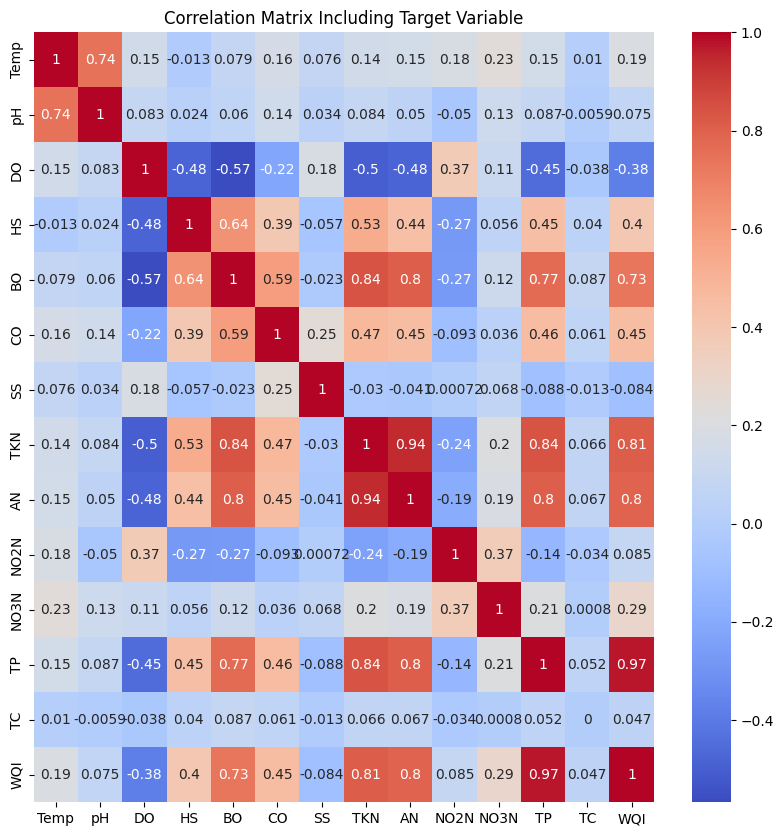

In [46]:
# Compute the correlation matrix
corr_matrix = data[ ['Temp', 'pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN', 'NO2N', 'NO3N', 'TP', 'TC', 'WQI']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Including Target Variable")
plt.show()

In [105]:
data['WQI'].sort_values(ascending=False)

104    81.956522
106    81.956522
107    81.956522
115    64.580870
205    63.364886
         ...    
744    27.344348
645    26.744348
11     26.281739
268    25.819130
159    25.746087
Name: WQI, Length: 917, dtype: float64

In [112]:
data['WQI'].describe()

count    917.000000
mean      39.542023
std        9.147667
min       25.746087
25%       31.638261
50%       37.229317
75%       46.233043
max       81.956522
Name: WQI, dtype: float64

In [12]:
def wqi_to_class(wqi):
    if wqi < 50:
        return 0  # Bad
    elif wqi <= 74:
        return 1  # Moderate
    else:
        return 2  # Good
    

classes = data['WQI'].apply(wqi_to_class)
classes.value_counts()

WQI
0    754
1    160
2      3
Name: count, dtype: int64

**Feature Selection**

In [126]:
X = data[ ['Temp', 'DO', 'pH', 'BO', 'SS', 'NO3N', 'CO'] ]

y = data['WQI']

In [128]:
y.describe()

count    917.000000
mean      39.542023
std        9.147667
min       25.746087
25%       31.638261
50%       37.229317
75%       46.233043
max       81.956522
Name: WQI, dtype: float64

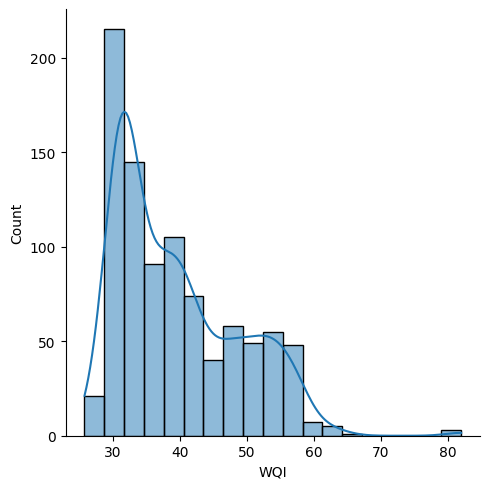

In [127]:
sns.displot(y, kde = True)

**Train Test Split**

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=42)

In [119]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

        return [min_val, max_val]
    
    return []

In [120]:
# removing the outliers from the X_train columns using the bounds
for col in X_train.columns:
    bounds = []
    bounds = outlier_count(col)
    if len(bounds) == 0:
        continue
    
    X_train[col] = X_train[col].clip(lower=bounds[0], upper=bounds[1])


---------------Temp---------------

Number of outliers: 41
Percent of data that is outlier: 5.26%

---------------DO---------------

Number of outliers: 5
Percent of data that is outlier: 0.64%

---------------pH---------------

Number of outliers: 15
Percent of data that is outlier: 1.93%

---------------BO---------------

Number of outliers: 50
Percent of data that is outlier: 6.42%

---------------SS---------------

Number of outliers: 58
Percent of data that is outlier: 7.45%

---------------NO3N---------------

Number of outliers: 12
Percent of data that is outlier: 1.54%

---------------CO---------------

Number of outliers: 34
Percent of data that is outlier: 4.36%


In [121]:
from imblearn.over_sampling import SMOTE

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Map WQI to classes for SMOTE
# def wqi_to_class(wqi):
#     if wqi < 50:
#         return 0
#     elif wqi <= 74:
#         return 1
#     else:
#         return 2

# y_train_classes = data.loc[X_train.index, 'WQI'].apply(wqi_to_class)

# # Apply SMOTE
# smote = SMOTE(k_neighbors=1, random_state=42)
# # smote = SMOTE(random_state=42, k_neighbors=2)  # k_neighbors ≤ min class size (3)
# X_train, y_train_res_classes = smote.fit_resample(X_train, y_train_classes)

# # Map resampled classes back to WQI (approximate, using original WQI distribution)
# y_train_res = []
# for cls in y_train_res_classes:
#     if cls == 0:
#         y_train_res.append(np.random.choice(data[data['WQI'] < 50]['WQI']))
#     elif cls == 1:
#         y_train_res.append(np.random.choice(data[(data['WQI'] >= 50) & (data['WQI'] <= 74)]['WQI']))
#     else:
#         y_train_res.append(np.random.choice(data[data['WQI'] > 74]['WQI']))
# y_train = np.log1p(np.array(y_train_res))

Scale the features using standard scalar for faster convergence.

In [122]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_resampled = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [123]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge

algorithms = {
    "Lasso": Lasso(random_state=42),
    "Ridge": Ridge(random_state=42),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [124]:
from sklearn.model_selection import KFold, cross_val_score

#defining splits
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in algorithms.items():
    cv_scores = cross_val_score(model, X_train_resampled, y_train, cv=kfold, scoring='neg_mean_squared_error')
    # Convert neg MSE to RMSE
    # rmse_scores = np.sqrt(-cv_scores)

    print(f"{name} - Score: {cv_scores}; Mean: {cv_scores.mean()}")

Lasso - Score: [-1.40675568e-06 -1.12151720e-06 -1.26631687e-06 -1.17048922e-06
 -1.08824399e-06]; Mean: -1.210664590861381e-06
Ridge - Score: [-5.84536661e-07 -4.65282757e-07 -5.51728555e-07 -4.50302745e-07
 -3.84635010e-07]; Mean: -4.872971454652429e-07
SVR - Score: [-1.41660815e-06 -1.12800233e-06 -1.27312336e-06 -1.17425488e-06
 -1.08115682e-06]; Mean: -1.2146291059805772e-06
Random Forest - Score: [-1.63444454e-07 -1.48919740e-07 -1.68814978e-07 -1.29689838e-07
 -1.37792078e-07]; Mean: -1.4973221762139295e-07
Gradient Boosting - Score: [-1.52419029e-07 -1.50711241e-07 -1.62570231e-07 -1.30289421e-07
 -1.33021120e-07]; Mean: -1.4580220815206045e-07


In [80]:
from sklearn.model_selection import GridSearchCV


# param_grid_rf = {
#     'n_estimators': [50, 100, 200],        # number of trees
#     'max_depth': [None, 10, 20, 30],        # maximum depth of each tree
#     'max_features': ['sqrt', 'log2', None], # number of features to consider when looking for best split
#     'bootstrap': [True, False]              # whether bootstrap samples are used
# }

param_grid_gb = {
    'n_estimators': [25, 50, 100, 200],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    # 'max_depth': [3, 4, 5, 6],  # Depth of trees
    # 'min_samples_split': [2, 5, 10],  # Min samples to split
    # 'min_samples_leaf': [1, 2, 4],  # Min samples per leaf
    # 'subsample': [0.7, 0.8, 0.9, 1.0],  # Subsample for stochastic gradient boosting
    'loss': ['squared_error', 'absolute_error', 'huber'],  # Loss function
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider for each split
}

# rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# grid_search = GridSearchCV(estimator=rf,
#                            param_grid=param_grid_rf,
#                            cv=kfold,
#                            n_jobs=-1,
#                            verbose=2,
#                            scoring='neg_mean_squared_error')

grid_search = GridSearchCV(estimator=gb,
                           param_grid=param_grid_gb,
                           cv=kfold,
                           n_jobs=-1,
                           verbose=0,
                           scoring='neg_mean_squared_error')

# Fit to training data
grid_search.fit(X_train_resampled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END learning_rate=0.01, loss=squared_error, max_features=None, n_estimators=25; total time=   0.0s
[CV] END learning_rate=0.01, loss=squared_error, max_features=None, n_estimators=25; total time=   0.0s
[CV] END learning_rate=0.01, loss=squared_error, max_features=None, n_estimators=25; total time=   0.1s
[CV] END learning_rate=0.01, loss=squared_error, max_features=None, n_estimators=25; total time=   0.1s
[CV] END learning_rate=0.01, loss=squared_error, max_features=None, n_estimators=25; total time=   0.1s
[CV] END learning_rate=0.01, loss=squared_error, max_features=None, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, loss=squared_error, max_features=None, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, loss=squared_error, max_features=None, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, loss=squared_error, max_features=None, n_estimators=50; total time=   0.1s
[

In [81]:
grid_search.best_estimator_

GradientBoostingRegressor(learning_rate=0.05, loss='huber', n_estimators=200,
                          random_state=42)

In [83]:
import joblib

model_name = 'wpp_model_weight.pkl'

joblib.dump(grid_search.best_estimator_, model_name)

['wpp_model_weight.pkl']

In [84]:
# Load the model
loaded_model = joblib.load(model_name)

# Make predictions
y_pred_log = loaded_model.predict(X_test)

In [86]:
y_pred = y_pred_log #np.expm1(y_pred_log)
y_test_orig = y_test #np.expm1(y_test)

In [87]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_log_error

print("MSE    :", mean_squared_error(y_test_orig, y_pred))
print("MAE:   :", mean_absolute_error(y_test_orig, y_pred))
print("RMSLE  :", root_mean_squared_log_error(y_test_orig, y_pred))

print("R2:    :", 
      r2_score(y_test_orig, y_pred))

MSE    : 97285.68996244507
MAE:   : 229.02300179033867
RMSLE  : 0.41423376394115613
R2:    : 0.6572911011393179


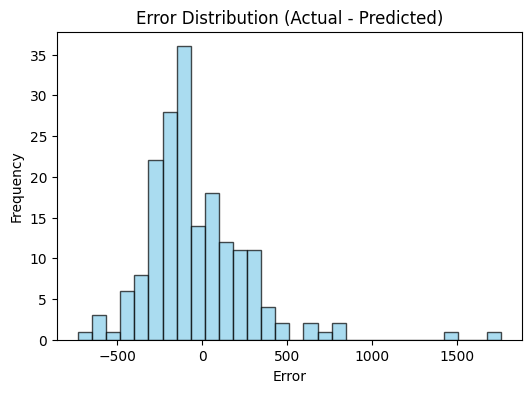

In [88]:
errors = y_test_orig - y_pred

# Plotting errors
plt.figure(figsize=(6, 4))

# Plotting error distribution
plt.hist(errors, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution (Actual - Predicted)')
plt.show()

In [89]:
df_comparison = pd.DataFrame({
    'Actual_WQI': y_test_orig,
    'Predicted_WQI': y_pred
})

df_comparison['Error'] = df_comparison['Actual_WQI'] - df_comparison['Predicted_WQI']
df_comparison.sort_values(by='Error', ascending=False)

,Actual_WQI,Predicted_WQI,Error
136,3358.965684,1604.069312,1754.896372
902,2727.901189,1301.569330,1426.331859
294,1575.427119,779.340909,796.086210
168,2378.581782,1604.372950,774.208832
773,1954.372054,1195.036102,759.335952
...,...,...,...
82,279.322581,829.977095,-550.654514
519,950.606221,1557.786481,-607.180261
65,882.735339,1501.306095,-618.570757
239,735.162888,1380.224344,-645.061456


In [28]:
loaded_model.feature_importances_

array([0.01802593, 0.09503101, 0.00860748, 0.53300029, 0.01909124,
       0.16985601, 0.00831077, 0.14807728])

Text(0.5, 1.0, 'Feature Importance Plot')

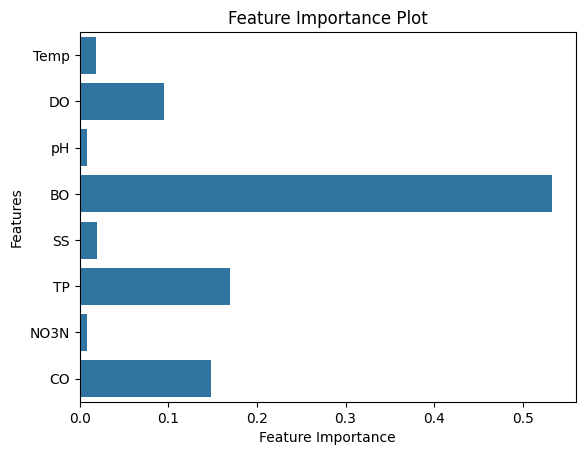

In [29]:
sns.barplot(x=loaded_model.feature_importances_, y = X_train.columns)

# Add labels
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')

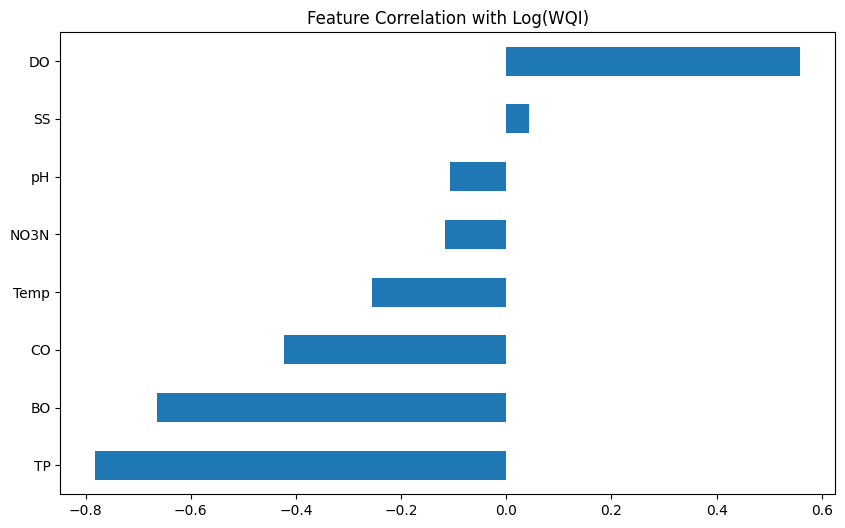

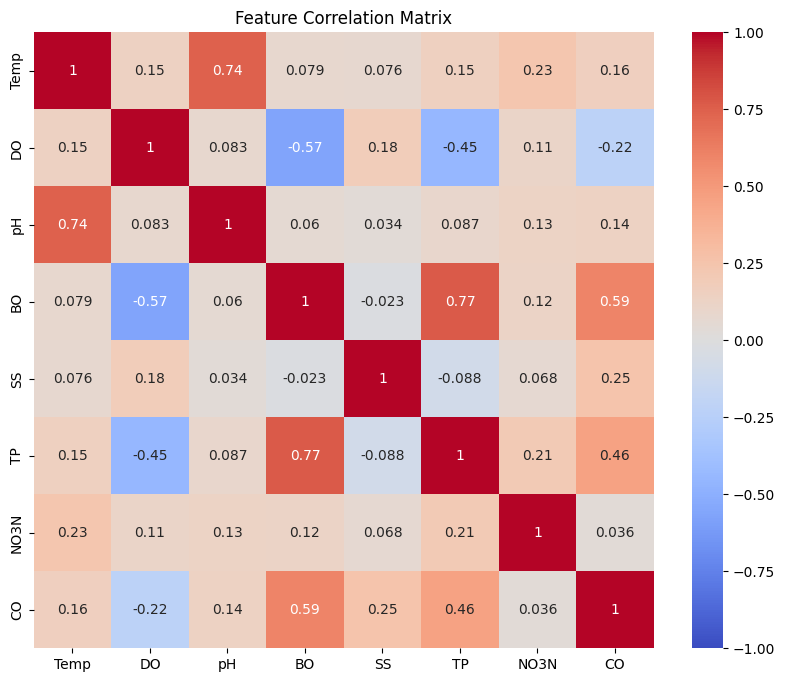

High correlation features: ['DO', 'BO', 'TP', 'CO']
Highly correlated pairs: []


In [53]:
# Compute correlations
data['WQI_log'] = np.log1p(data['WQI'])
corr_with_wqi = data[X.columns.tolist() + ['WQI_log']].corr()['WQI_log'].drop('WQI_log')

# Visualize correlation with WQI
plt.figure(figsize=(10, 6))
corr_with_wqi.sort_values().plot(kind='barh')
plt.title('Feature Correlation with Log(WQI)')
plt.show()

# Feature-feature correlation
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

# Select features with high correlation to WQI (e.g., abs(corr) > 0.3)
high_corr_features = corr_with_wqi[abs(corr_with_wqi) > 0.3].index.tolist()
print("High correlation features:", high_corr_features)

# Identify highly correlated feature pairs
high_corr_pairs = [(i, j) for i in X.columns for j in X.columns
                   if i < j and abs(corr_matrix.loc[i, j]) > 0.8]
print("Highly correlated pairs:", high_corr_pairs)